En este proyecto se desarrolla un modelo de regresion lineal para predecir la emision de co2 de acuerdo al desplazamiento de los cilindros de un motor en litros ("ENGINESIZE") de los vehiculos registrados en el dataset de 1995 al 2014 en Canada. [Dataset source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

In [1]:
# Importacion de librerias
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [2]:
#Importa el archivo CSV:
df = pd.read_csv('/content/FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
#Vistazo descriptivo:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
#Seleccion de las columnas relevantes a analizar en la prediccion:
select_df = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
select_df.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


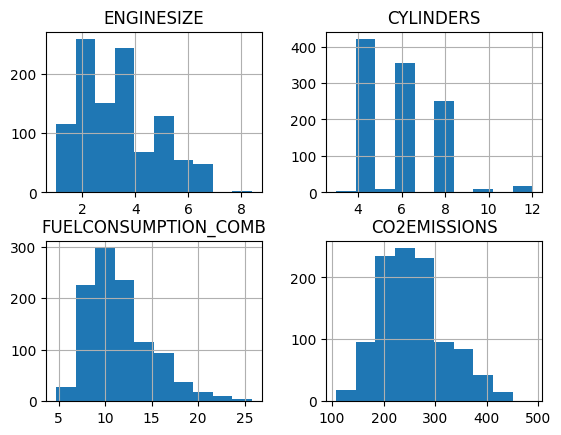

In [5]:
#Observacion de los histogramas de los datos:
select_df.hist()
plt.show()

Se visualiza la correlacion de las tres primeras columnas con la emision de CO2:

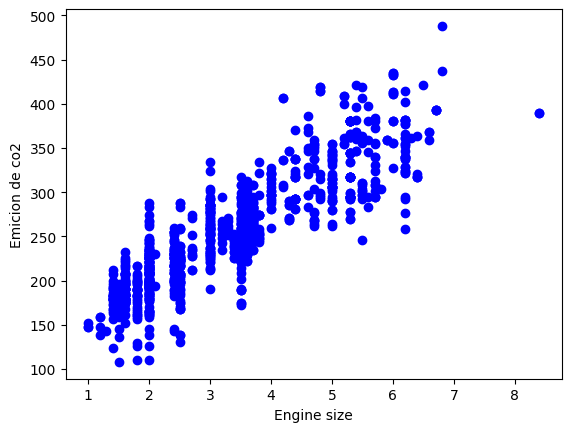

In [6]:
plt.scatter(select_df.ENGINESIZE, select_df.CO2EMISSIONS, color='blue')
plt.xlabel('Engine size')
plt.ylabel('Emicion de co2')
plt.show()

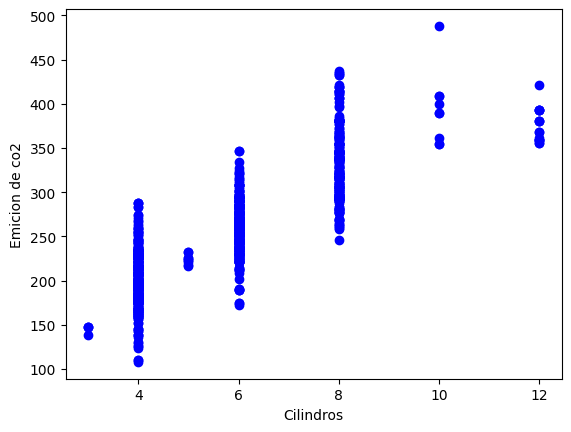

In [7]:
plt.scatter(select_df.CYLINDERS, select_df.CO2EMISSIONS, color='blue')
plt.xlabel('Cilindros')
plt.ylabel('Emicion de co2')
plt.show()

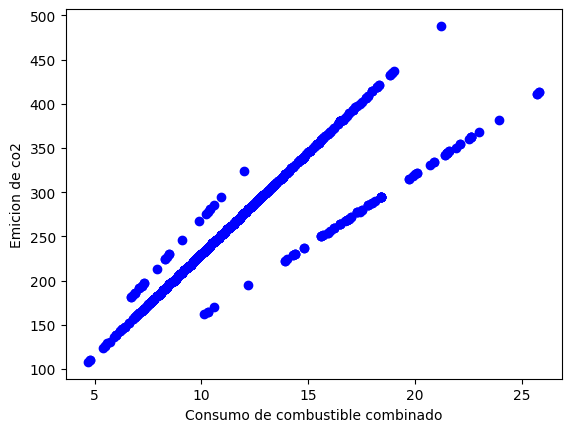

In [8]:
plt.scatter(select_df.FUELCONSUMPTION_COMB, select_df.CO2EMISSIONS, color='blue')
plt.xlabel('Consumo de combustible combinado')
plt.ylabel('Emicion de co2')
plt.show()

In [9]:
#Se divide el dataset de manera aleatoria, un 80% para el conjunto de entrenamiento, \
#y un 20% para el conjunto de prueba, utilizando lo que se llama una 'mascara Booleana':

mascara = np.random.rand(len(df)) < 0.8
train = select_df[mascara]
test = select_df[~mascara]

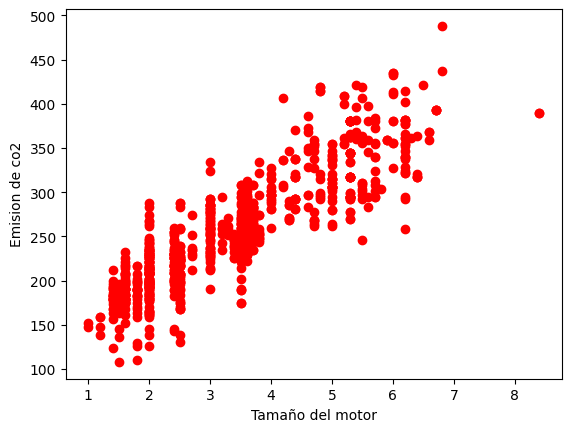

In [10]:
#Correlacion entre la data de entrenamiento:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='red')
plt.xlabel('Tamaño del motor')
plt.ylabel('Emision de co2')
plt.show()

Modelamiento

In [12]:
#Se descarga la libreria del modelo lineal:
from sklearn import linear_model
#Se inicializa el modelo:
modelo = linear_model.LinearRegression()
#Se determinan los datos de entrenamiento:
train_x = train[['ENGINESIZE']]
train_y= train[['CO2EMISSIONS']]
#Se ajusta el modelo:
modelo.fit(train_x, train_y)
#Se imprimen: el coeficiente de la pendiente y la intercepcion de la ecuacion lineal:
print('Coeficiente:', modelo.coef_)
print('Intercepcion:', modelo.intercept_)

Coeficiente: [[39.01290622]]
Intercepcion: [125.72755409]


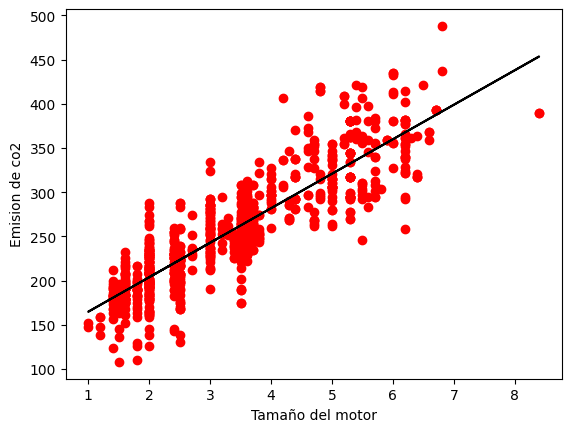

In [16]:
#Se grafica la linea de prediccion:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='red')
plt.plot(train_x, modelo.coef_[0][0]*train_x + modelo.intercept_[0], color = 'black')
plt.xlabel('Tamaño del motor')
plt.ylabel('Emision de co2')
plt.show()

Evaluacion del modelo

In [17]:
#A continuacion se hace un test del modelo y se calculan algunas medidas de error:
from sklearn.metrics import r2_score

test_x = test[['ENGINESIZE']]
test_y = test[['CO2EMISSIONS']]
test_y_predict = modelo.predict(test_x)

#Medidas de error:
print('MAE:' , np.mean(np.absolute(test_y_predict - test_y)))
print('MSE:' , np.mean((test_y_predict - test_y)**2) )
print('R2 score:' , r2_score(test_y, test_y_predict))

MAE: CO2EMISSIONS    23.15137
dtype: float64
MSE: CO2EMISSIONS    929.3029
dtype: float64
R2 score: 0.7512917906728369


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [26]:
#Se pone a prueba el modelo lineal, prediciendo la emision de CO2 de un vehiculo con un ENGINE SIZE de 4.5:
new_car_enginesize = [[4.5]]
prediccion = modelo.predict(new_car_enginesize)
print('La emision de co2 prevista para este vehiculo es:', round(float(prediccion),2))

La emision de co2 prevista para este vehiculo es: 301.29


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
